In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
map_df = gpd.read_file('india_state.geojson')
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


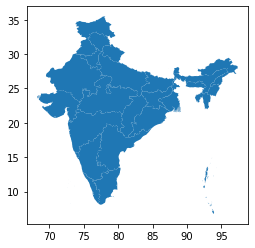

In [3]:
map_df.plot()

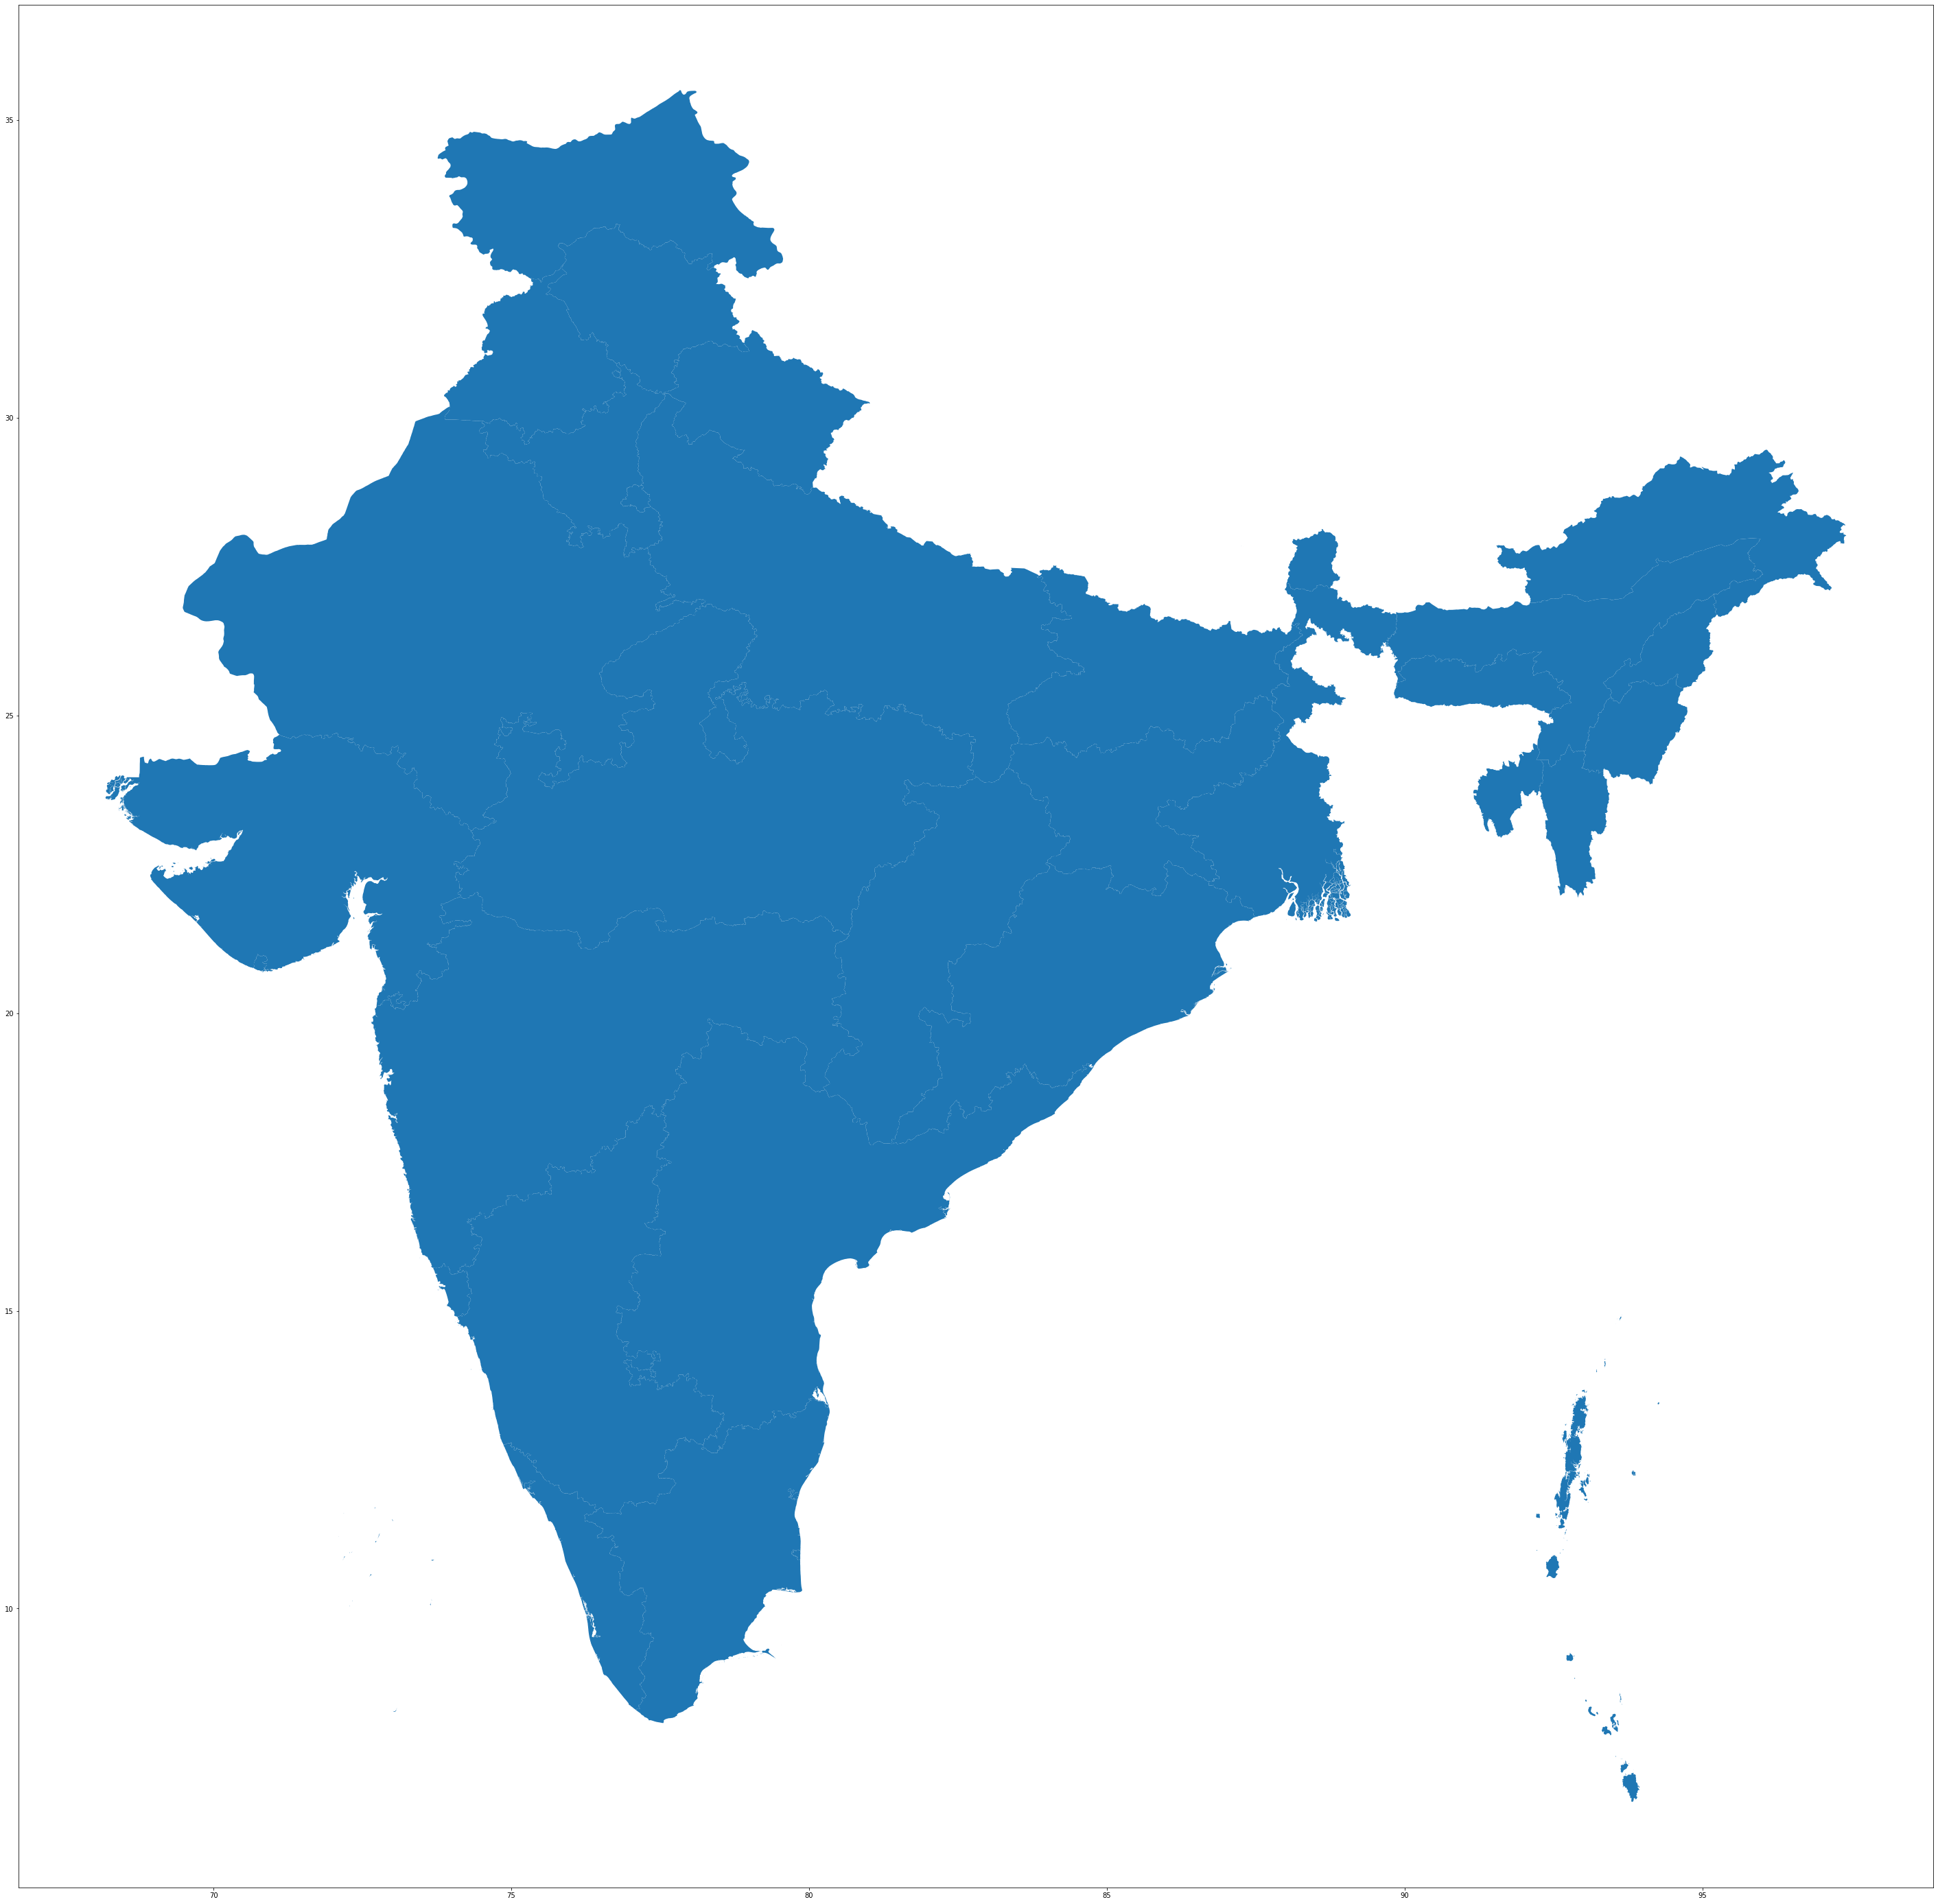

In [4]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()


In [5]:
new=pd.read_csv('NewMap.csv')
new.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,%contribution
0,Andaman and Nicobar,86.63,1.00,6.5,0.0
1,Andhra Pradesh,67.02,9.20,2.0,8.2
2,Arunachal Pradesh,65.38,34.67,2.2,0.1
3,Assam,72.19,31.98,4.6,2.9
4,Bihar,61.80,33.70,3.4,5.8


In [6]:
merged=map_df.merge(new,how='left',left_on='NAME_1',right_on='State/UT')

In [7]:
merged.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry,State/UT,Literacy rate,Poverty rate,Unemployment rate,%contribution
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",Andaman and Nicobar,86.63,1.00,6.5,0.0
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",Andhra Pradesh,67.02,9.20,2.0,8.2
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",Arunachal Pradesh,65.38,34.67,2.2,0.1
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",Assam,72.19,31.98,4.6,2.9
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",Bihar,61.80,33.70,3.4,5.8


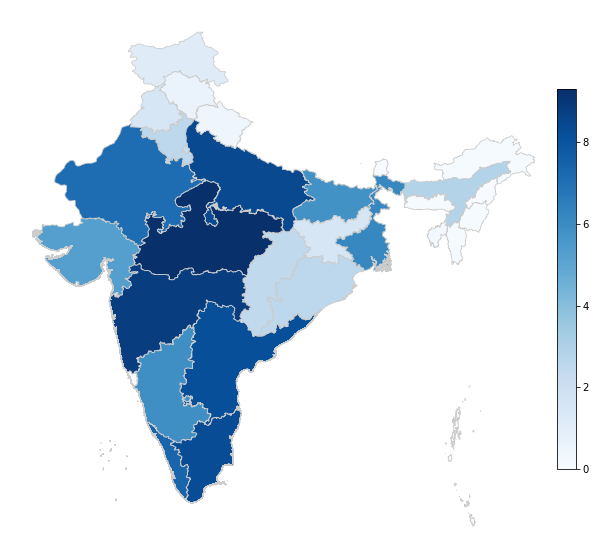

<Figure size 864x720 with 0 Axes>

In [31]:
vmin=new['%contribution'].min()
vmax=new['%contribution'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
plt.figure(figsize=(12,10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
fig.colorbar(sm, shrink=0.7,pad=-0.002)
merged.plot(column='%contribution', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

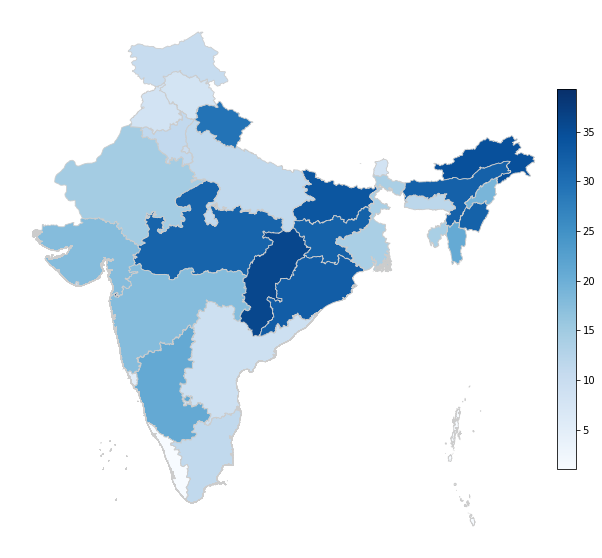

In [32]:
vmin=new['Poverty rate'].min()
vmax=new['Poverty rate'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
fig.colorbar(sm, shrink=0.7,pad=-0.002)
merged.plot(column='Poverty rate', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

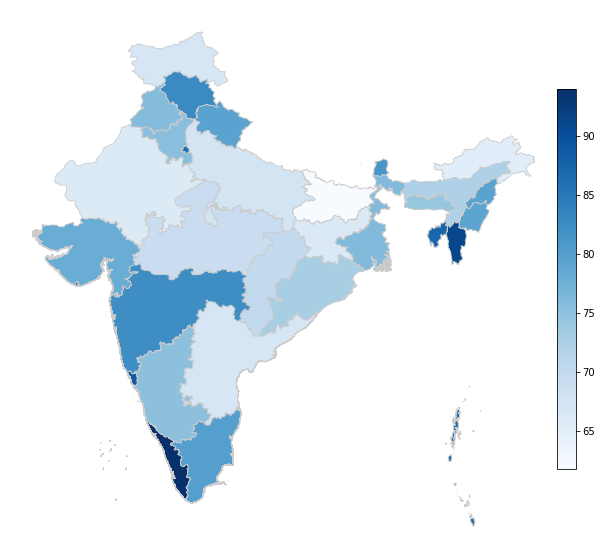

In [33]:
vmin=new['Literacy rate'].min()
vmax=new['Literacy rate'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
fig.colorbar(sm, shrink=0.7, pad=-0.002)
merged.plot(column='Literacy rate', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

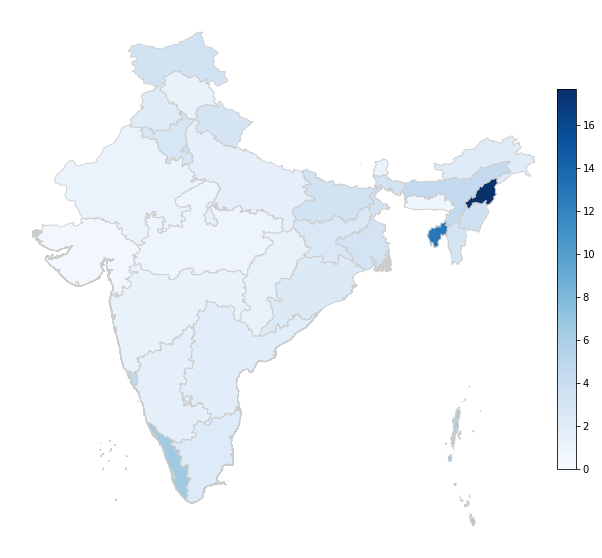

In [34]:
vmin=new['Unemployment rate'].min()
vmax=new['Unemployment rate'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm.set_array([])
fig.colorbar(sm, shrink=0.7, pad=-0.002)
merged.plot(column='Unemployment rate', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')